#### Calculation of results
Using the function `eval_model.py`, the estimates and variances of each energy value in the test sets are evaluated.
An example is given below. Note that loading the dataset may close to an hour.

In [ ]:
# Test of model trained om PC9 dataset and the energy measurement E, tested on PC9 test set.
!python3 scripts/eval_model.py --load_model models/PC9_E/model_output_pt4/exit_model.pth --load_model_args models/PC9_E/model_output_pt4/arguments.json --dataset data/pc9.db --split_file models/PC9_E/model_output_pt4/datasplits.json --output_dir tests/PC9_E

In [ ]:
# Test of model trained om PC9 dataset and the energy measurement E, tested on PC9 test set.
!python3 scripts/eval_model.py --load_model models/PC9_E/model_output_pt4/exit_model.pth --load_model_args models/PC9_E/model_output_pt4/arguments.json --dataset data/pc9_test.db --split_file runs/model_output/datasplits.json --output_dir tests/temp --sample_size 10

#### Visualisation of the evaluation of E on PC9 test set
The result for the model trained on the energy measurement E on the dataset PC9 are visualised.

In [203]:
import torch
import numpy as np
PC9_E_test = torch.load("tests/PC9_E/res.pt")
PC9_E_res = PC9_E_test["values"]
PC9_E_errors = PC9_E_res[:,0] - PC9_E_res[:,2]
PC9_E_AE = PC9_E_errors.abs()
print("MAE of PC9_E errors:")
print(PC9_E_AE.mean())
print("RMSE of PC9_E errors:")
print(PC9_E_errors.pow(2).mean().sqrt())
print("Max AE:")
print(PC9_E_AE.max())
print("99% quantile of errors:")
print(torch.quantile(PC9_E_AE,0.99))

# Correlation between errors and estimated variances?

MAE of PC9_E errors:
tensor(0.0177)
RMSE of PC9_E errors:
tensor(0.0462)
Max AE:
tensor(1.5203)
99% quantile of errors:
tensor(0.1595)


In [206]:
print(torch.quantile(PC9_E_AE,0.999))

tensor(0.5622)


In [217]:
# The errors above the 99.9% percentile are found.
list_of_molecules_PC9_E = {}
#quant = torch.quantile(PC9_E_AE,0.999)
for index, error in zip(PC9_E_test["index"],PC9_E_AE):
    if error > 1:
        list_of_molecules_PC9_E[index] = error

list_of_molecules_PC9_E

{tensor(20597111, dtype=torch.int32): tensor(1.1322),
 tensor(59938748, dtype=torch.int32): tensor(1.2999),
 tensor(53630482, dtype=torch.int32): tensor(1.5203)}

These chemicals are `O1OOO1`, `[CH2]C[C@@H]1CC[C@H](CC1)[CH2]`, and `[CH2]C(=C)[N][C][N]C(=C)[CH2]`.

#### Analysis of E on QM9 test set
Results from training to predict E on the QM9 on the training set, tested on the test set.

In [97]:
QM9_E_test = torch.load("tests/QM9_E/res.pt")
QM9_E_res = QM9_E_test["values"]
QM9_E_errors = QM9_E_res[:,0] - QM9_E_res[:,2]
QM9_E_AE = QM9_E_errors.abs()
print("MAE of QM9_E errors:")
print(QM9_E_AE.mean())
print("RMSE of QM9_E errors:")
print(QM9_E_errors.pow(2).mean().sqrt())
print("Max AE:")
print(QM9_E_AE.max())
print("99% quantile of errors:")
print(torch.quantile(QM9_E_AE,0.99))

MAE of QM9_E errors:
tensor(0.0096)
RMSE of QM9_E errors:
tensor(0.0352)
Max AE:
tensor(2.3487)
99% quantile of errors:
tensor(0.0498)


In [216]:
# The errors above the 99.9% percentile are found.
list_of_molecules_QM9_E = {}
#quant = torch.quantile(QM9_E_AE,0.999)
for index, error in zip(QM9_E_test["index"],QM9_E_AE):
    if error > 1:
        list_of_molecules_QM9_E[index] = error

list_of_molecules_QM9_E

{tensor(129158, dtype=torch.int32): tensor(2.1235),
 tensor(56016, dtype=torch.int32): tensor(1.0764),
 tensor(102794, dtype=torch.int32): tensor(2.3487)}

These molecules are `N=C1N=NON=NC1=O`, `[O-]C(=O)CN1CC[NH+]=C1`, and `[NH3+]CC(NC=O)C([O-])=O`.

#### Analysis of U0 on QM9 test set
Results from training to predict E on the QM9 on the training set, tested on the test set.

In [99]:
QM9_U0_test = torch.load("tests/QM9_U0/res.pt")
QM9_U0_res = QM9_U0_test["values"]
QM9_U0_errors = QM9_U0_res[:,0] - QM9_U0_res[:,2]
QM9_U0_AE = QM9_U0_errors.abs()
print("MAE of QM9_U0 errors:")
print(QM9_U0_AE.mean())
print("RMSE of QM9_U0 errors:")
print(QM9_U0_errors.pow(2).mean().sqrt())
print("Max AE:")
print(QM9_U0_AE.max())
print("99% quantile of errors:")
print(torch.quantile(QM9_U0_AE,0.99))

MAE of QM9_U0 errors:
tensor(0.0092)
RMSE of QM9_U0 errors:
tensor(0.0237)
Max AE:
tensor(1.0734)
99% quantile of errors:
tensor(0.0461)


In [215]:
# The errors above the 1 percentile are found.
list_of_molecules_QM9_U0 = {}
#quant = torch.quantile(QM9_U0_AE,0.999)
for index, error in zip(QM9_U0_test["index"],QM9_U0_AE):
    if error > 1:
        list_of_molecules_QM9_U0[index] = error

list_of_molecules_QM9_U0

{tensor(37499, dtype=torch.int32): tensor(1.0574),
 tensor(77460, dtype=torch.int32): tensor(1.0734)}

These molecules are `O1C2C3C1C1N=C3OC21` and `OC1C2(O)CC(=O)C12O`.

#### Visualization of results

In [71]:
PC9_E_res[:,1]

tensor([2.8305e-05, 4.1073e-06, 1.9185e-05,  ..., 7.9445e-06, 1.6062e-05,
        7.0395e-06])

In [ ]:
QM9_E_res[:,1]

In [112]:
# Final data analysis is done without the outliers.
PC9_E_res_short = PC9_E_res[PC9_E_AE < torch.quantile(PC9_E_AE,0.99),:]
QM9_E_res_short = QM9_E_res[QM9_E_AE < torch.quantile(QM9_E_AE,0.99),:]
QM9_U0_res_short = QM9_U0_res[QM9_U0_AE < torch.quantile(QM9_U0_AE,0.99),:]

PC9EAEs = (PC9_E_res_short[:,0] - PC9_E_res_short[:,2]).abs()
QM9EAEs = (QM9_E_res_short[:,0] - QM9_E_res_short[:,2]).abs()
QM9EAU0s = (QM9_U0_res_short[:,0] - QM9_U0_res_short[:,2]).abs()

In [113]:
PC9EAEs.max()

tensor(0.1591)

In [195]:
def data_to_bins(res):
    min_var = res[:,1].min()
    max_var = res[:,1].max()

    bins = torch.linspace(min_var,max_var+1e-8,steps = 10) # 1e-8 added so the end point is included.
    Mvar = torch.zeros(len(bins)-1)
    MAEerror = torch.zeros(len(bins)-1)
    #numVals = torch.zeros(len(bins)-1)
    var = res[:,1]
    errors = (res[:,0] - res[:,2]).abs()
    #errors = (res[:,0] - res[:,2])

    for i in range(0,len(bins)-1):
        values = (var >= bins[i]) & (var < bins[i+1])
        Mvar[i] = var[values].mean()
        #Mvar[i] = var[values].mean().sqrt()
        MAEerror[i] = errors[values].mean()
        #MAEerror[i] = errors[values].pow(2).mean().sqrt()
        #numVals[i] = values.long().sum()

    # Drops NaN bins, i.e. empty bins.
    Mvar = Mvar[~Mvar.isnan()]
    MAEerror = MAEerror[~MAEerror.isnan()]
    #numVals = numVals[~Mvar.isnan()]
    
    return Mvar, MAEerror#, numVals

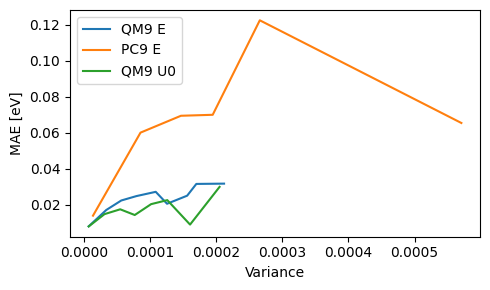

In [202]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,3)
Mvar1, MAEerror1 = data_to_bins(QM9_E_res_short)
plt.plot(Mvar1,MAEerror1)
Mvar2, MAEerror2 = data_to_bins(PC9_E_res_short)
plt.plot(Mvar2,MAEerror2)
Mvar3, MAEerror3 = data_to_bins(QM9_U0_res_short)
plt.plot(Mvar3,MAEerror3)
plt.legend(["QM9 E","PC9 E","QM9 U0"])
plt.xlabel("Variance")
plt.ylabel("MAE [eV]")
plt.tight_layout()
#plt.savefig("graph.png")
plt.show()